In [3]:
import numpy as np
import matplotlib.pyplot as plt
import lineshapes

# Hydrogen Balmer-$\alpha$ transition

In [2]:
energy_upper = [
    12.0874936591, 12.0875071004,  # 3p (1/2, 3/2)
    12.0874949611,  # 2s (1/2)
    12.0875070783, 12.0875115582,  # 3d (3/2, 5/2)
]
L_upper = [1, 1, 0, 2, 2]
J_upper = [1/2, 3/2, 1/2, 3/2, 5/2]
energy_lower = [
    10.19880615024, 10.19885151459,  # 2p (1/2, 3/2)
    10.19881052514816  # 2s (1/2)
]
L_lower = [1, 1, 0]
J_lower = [1/2, 3/2, 1/2]
Spq = np.array([
    # from 3p(1/2)   3p(3/2)    3s(1/2)      3d(3/2)    3d(5/2)
    [       0.0,        0.0, 5.8769e-01, 3.0089e+01,        0.0],   # to 2p (1/2)
    [       0.0,        0.0, 1.1756e+00, 6.0180e+00, 5.4162e+01], # to 2p (3/2)
    [6.2687e+00, 1.2537e+01,        0.0,        0.0,        0.0],  # to 2s (1/2)
]).T

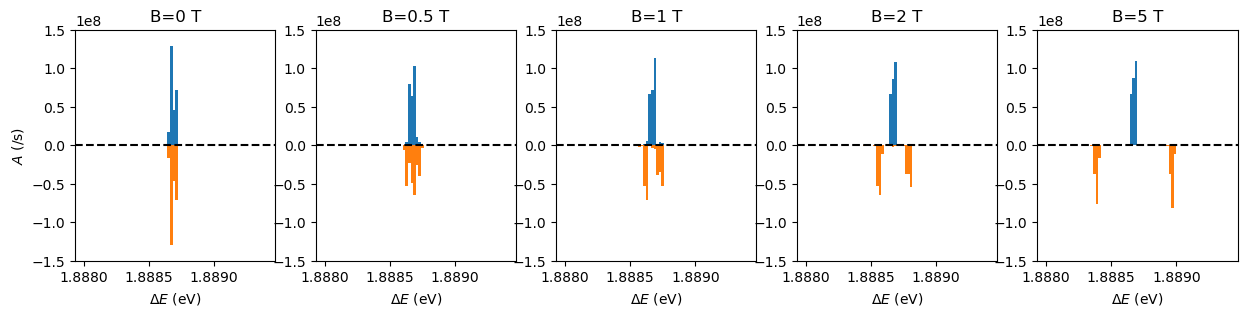

In [6]:
bins = np.linspace(1.888, 1.8894, num=71)

plt.figure(figsize=(15, 3))
for i, B in enumerate([0, 0.5, 1, 2, 5]):
    zeeman_H = lineshapes.zeeman.LS(
        energy_upper, energy_lower, 
        J_upper=J_upper, J_lower=J_lower, 
        L_upper=L_upper, L_lower=L_lower, 
        S_upper=1/2, S_lower=1/2, B=B, 
        line_strengths_LJ=Spq,
        return_xr=True
    )
    
    plt.subplot(1, 5, i + 1)
    plt.hist(
        zeeman_H['deltaE'].sel(deltaM=0).values.ravel(), 
        weights=zeeman_H['A'].sel(deltaM=0).values.ravel(), 
        bins=bins
    )
    plt.hist(
        zeeman_H['deltaE'].sel(deltaM=[-1, 1]).values.ravel(), 
        weights=-zeeman_H['A'].sel(deltaM=[-1, 1]).values.ravel() / 2, 
        bins=bins
    )
    plt.axhline(0, ls='--', color='k')
    plt.ylim(-1.5e8, 1.5e8)
    plt.xlabel('$\Delta E$ (eV)')
    if i == 0:
        plt.ylabel('$A$ (/s)')
        
    plt.title('B={} T'.format(B))
plt.savefig('Zeeman.Halpha.png', bbox_inches='tight')